# Student Performance vs Funding

#### Data sources: https://www.kaggle.com/noriuk/us-educational-finances?select=states.csv

### Import Dependencies and Setup for the analyze

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import warnings

# Study data files paths
average_scores_path = "Input_Data/naep.csv"
unemployment_crime_path = "Input_Data/unemployment_crime.csv"

# Read the score data and the revenue results
scores_data = pd.read_csv(average_scores_path)
unemployment_crime_data = pd.read_csv(unemployment_crime_path)
unemployment_crime_data.head()

,year,state,unemployment_rate,violent_crime_rate,property_crime_rate
0,2019,Alabama,3.0,504.67,2622.80
1,2019,Alaska,5.4,865.05,2902.52
2,2019,Arizona,4.9,447.12,2435.98
3,2019,Arkansas,3.5,580.84,2847.71
4,2019,California,4.2,442.07,2335.78


In [4]:
# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, unemployment_crime_data, how = "inner", 
                          left_on=['state','year'], right_on=['state', 'year'])

# Convert to numeric
merged_data_df['avg_score'] = merged_data_df['avg_score'].apply(pd.to_numeric, errors = 'coerce')
merged_data_df['unemployment_rate'] = merged_data_df['unemployment_rate'].apply(pd.to_numeric, errors = 'coerce')
merged_data_df['violent_crime_rate'] = merged_data_df['violent_crime_rate'].apply(pd.to_numeric, errors = 'coerce' )
merged_data_df['property_crime_rate'] = merged_data_df['property_crime_rate'].apply(pd.to_numeric, errors = 'coerce' )

merged_data_df = merged_data_df.dropna()

# Display the data table for preview
merged_data_df

,year,state,avg_score,subject,grade,unemployment_rate,violent_crime_rate,property_crime_rate
0,2019,Alabama,268.703899,Mathematics,8,3.0,504.67,2622.80
1,2019,Alabama,229.651002,Mathematics,4,3.0,504.67,2622.80
2,2019,Alabama,253.398605,Reading,8,3.0,504.67,2622.80
3,2019,Alabama,211.728520,Reading,4,3.0,504.67,2622.80
4,2019,Alaska,274.337801,Mathematics,8,5.4,865.05,2902.52
...,...,...,...,...,...,...,...,...
1831,2003,Wisconsin,220.833428,Reading,4,5.7,221.11,2880.45
1832,2003,Wyoming,283.503350,Mathematics,8,4.3,261.70,3315.60
1833,2003,Wyoming,241.085701,Mathematics,4,4.3,261.70,3315.60
1834,2003,Wyoming,267.001029,Reading,8,4.3,261.70,3315.60


The r-value is -0.04773714425795472
The p-value is 0.04083106808577536


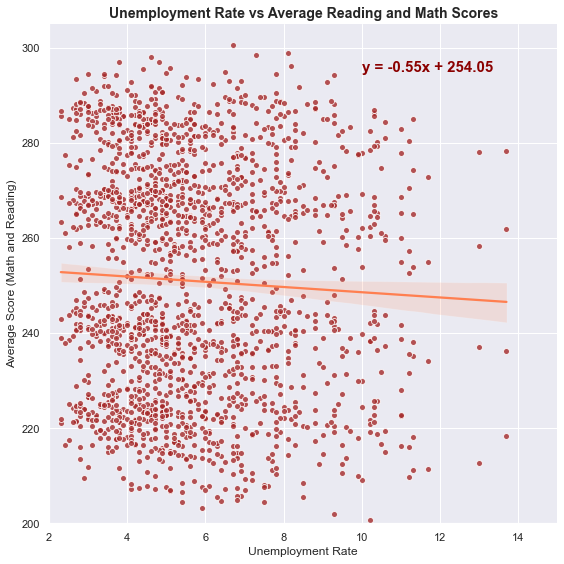

In [10]:
# Linear regression for unemployment rate vs average math and reading scores
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(merged_data_df["unemployment_rate"],
                                                            merged_data_df["avg_score"])


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (10, 295), fontsize = 15, color = "darkred", fontweight = "bold")
ax.set(xlim = (2, 15), ylim = (200, 305))

sns.regplot(data = merged_data_df, x = "unemployment_rate", y = "avg_score", 
            line_kws = {"color": "coral", "label":"y = {0:.1f}x+{1:.1f}".format(slope,intercept)},
            scatter_kws = {"color": "brown", "edgecolor": "w"})

plt.xlabel("Unemployment Rate", fontsize = 12)
plt.ylabel("Average Score (Math and Reading)", fontsize = 12)
plt.title("Unemployment Rate vs Average Reading and Math Scores", 
          fontsize = 14, fontweight = "bold")

print(f"The r-value is {r_value}")
print(f"The p-value is {p_value}")

plt.tight_layout()
plt.show()



The r-value is -0.1742097163592531
The p-value is 5.600302500228336e-14


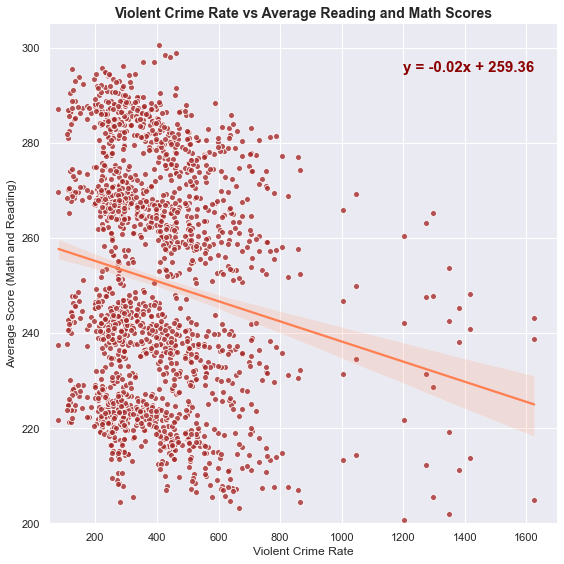

In [16]:
# Linear regression for violent crime rate vs average math and reading scores
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(merged_data_df["violent_crime_rate"],
                                                            merged_data_df["avg_score"])


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (1200, 295), fontsize = 15, color = "darkred", fontweight = "bold")
ax.set(xlim = (50, 1700), ylim = (200, 305))

sns.regplot(data = merged_data_df, x = "violent_crime_rate", y = "avg_score", 
            line_kws = {"color": "coral", "label":"y = {0:.1f}x+{1:.1f}".format(slope,intercept)},
            scatter_kws = {"color": "brown", "edgecolor": "w"})

plt.xlabel("Violent Crime Rate", fontsize = 12)
plt.ylabel("Average Score (Math and Reading)", fontsize = 12)
plt.title("Violent Crime Rate vs Average Reading and Math Scores", 
          fontsize = 14, fontweight = "bold")

print(f"The r-value is {r_value}")
print(f"The p-value is {p_value}")

plt.tight_layout()
plt.show()

The r-value is -0.16145044262447508
The p-value is 3.4291744544963407e-12


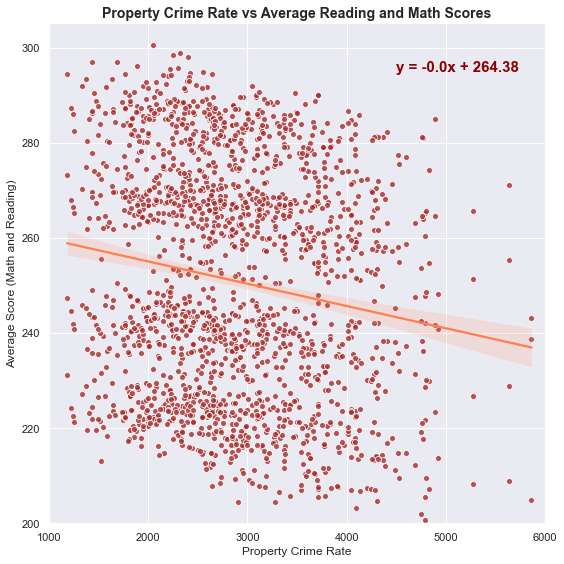

In [20]:
# Linear regression for property crime rate vs average math and reading scores
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(merged_data_df["property_crime_rate"],
                                                            merged_data_df["avg_score"])


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (4500, 295), fontsize = 15, color = "darkred", fontweight = "bold")
ax.set(xlim = (1000, 6000), ylim = (200, 305))

sns.regplot(data = merged_data_df, x = "property_crime_rate", y = "avg_score", 
            line_kws = {"color": "coral", "label":"y = {0:.1f}x+{1:.1f}".format(slope,intercept)},
            scatter_kws = {"color": "brown", "edgecolor": "w"})

plt.xlabel("Property Crime Rate", fontsize = 12)
plt.ylabel("Average Score (Math and Reading)", fontsize = 12)
plt.title("Property Crime Rate vs Average Reading and Math Scores", 
          fontsize = 14, fontweight = "bold")

print(f"The r-value is {r_value}")
print(f"The p-value is {p_value}")

plt.tight_layout()
plt.show()